<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [62]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-08 18:45:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-05-08 18:45:19 (12.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    openssl-1.0.2r             |       h7b6447c_0         3.2 MB  anaconda
    seaborn-0.9.0              |           py35_0         378 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1     --> 2018.8.24-py35_1  anaconda
    openssl:         1.0.2p-h14c3975_0    --> 1.0.2r-h7b6447c_0 anaconda
    seaborn:         0

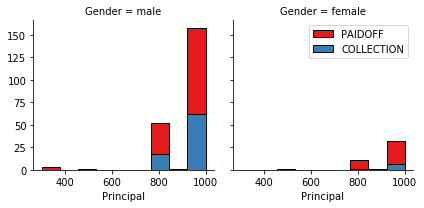

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

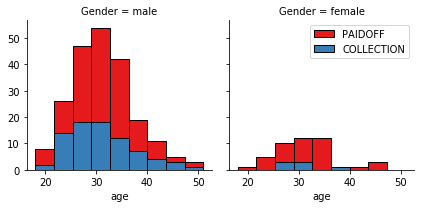

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

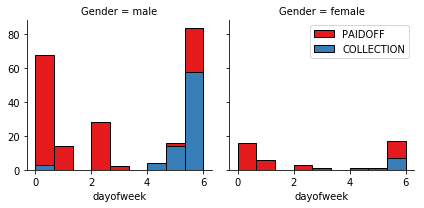

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head() 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
# my addition
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True) 
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
Feature1 = df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)
Feature1.head() 

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
#########################
# added by me to derive Feature2 : Curious to see the difference when education is not spread on columns
#########################

df_dt = df
df_dt['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3],inplace=True)

Feature2 = df_dt[['Principal','terms','age','education','Gender','weekend']]
Feature2.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0
2,1000,15,27,1,0,0
3,1000,30,28,1,1,1
4,1000,30,29,1,0,1


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

### Feature selection

Lets defind feature sets, X:

In [18]:
X1 = Feature1
X2 = Feature2
X1[0:2]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0


In [19]:
# added by me
X2[0:2]

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0


In [20]:
# added by me
print( 'X1:' ,"\n",X1.dtypes, "\n")
print( 'X2:' ,"\n",X2.dtypes, "\n")
print( 'They are all numeric') 
print( '############')

X1: 
 Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object 

X2: 
 Principal    int64
terms        int64
age          int64
education    int64
Gender       int64
weekend      int64
dtype: object 

They are all numeric
############


What are our lables?

In [21]:
y1 = df['loan_status'].values
y2 = df['loan_status'].values
print(y1[0:5], "---", y2[0:5] )

[0 0 0 0 0] --- [0 0 0 0 0]


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X2= preprocessing.StandardScaler().fit(X2).transform(X2)
X1[0:3]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679]])

In [23]:
X2[0:3]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004,
        -1.20577805]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [24]:
from sklearn.model_selection import train_test_split
# remember the reason we have two feature sets
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.3, random_state=4)
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.3, random_state=4)
print ('X1_train .. X1_test shape >>', X1_train.shape, '..' , X1_test.shape) 
print ('X2_train .. X2_test shape >>', X2_train.shape, '..' , X2_test.shape)
print ('y1_train  .. y1_test shape >> ', y1_train.shape,  '  .. ' , y1_test.shape) 
print ('y2_train  .. y2_test shape >> ', y2_train.shape,  '  .. ' , y2_test.shape) 

X1_train .. X1_test shape >> (242, 8) .. (104, 8)
X2_train .. X2_test shape >> (242, 6) .. (104, 6)
y1_train  .. y1_test shape >>  (242,)   ..  (104,)
y2_train  .. y2_test shape >>  (242,)   ..  (104,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# METRICS
from sklearn import metrics

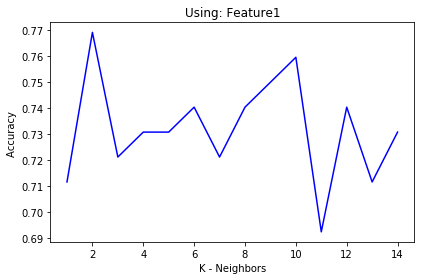

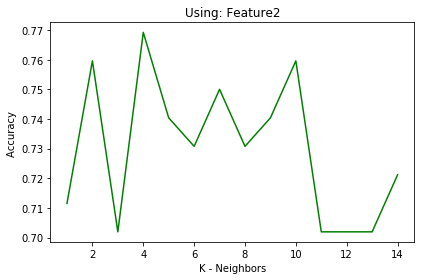

From the graphs above, we see that the best test results are: 
 using Feature1, KNeighbours = 2  with a value of: 0.769230769231 
 using Feature2, KNeighbours = 4  with a value of: 0.769230769231 



In [26]:
Krange = 15
met_acc1 = np.zeros((Krange-1))
met_acc2 = np.zeros((Krange-1))
std_acc = np.zeros((Krange-1))
for n in range(1,Krange): 
    KNNClass1 = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    yhat=KNNClass1.predict(X1_test)
    met_acc1[n-1] = metrics.accuracy_score(y1_test, yhat)

plt.plot(range(1,Krange),met_acc1,'b')
plt.title('Using: Feature1')
plt.ylabel('Accuracy ')
plt.xlabel('K - Neighbors')
plt.tight_layout()
plt.show() 

########## KNN with Feature2 (X2) ##########

for n in range(1,Krange): 
    KNNClass2 = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    yhat=KNNClass2.predict(X2_test)
    met_acc2[n-1] = metrics.accuracy_score(y2_test, yhat)

plt.plot(range(1,Krange),met_acc2,'g')
plt.title('Using: Feature2')
plt.ylabel('Accuracy ')
plt.xlabel('K - Neighbors')
plt.tight_layout()
plt.show() 
print( "From the graphs above, we see that the best test results are:", "\n", 
      "using Feature1, KNeighbours =", (met_acc1.argmax() +1), " with a value of:",  met_acc1.max() , "\n",
      "using Feature2, KNeighbours =", (met_acc2.argmax() +1), " with a value of:",  met_acc2.max() , "\n"
     )  

In [27]:
# SO WE RE-INTRODUCE KNNClass1 to be used on our "Loan_Test.csv" Data set
KNNClass1 = KNeighborsClassifier(n_neighbors = 2).fit(X1_train,y1_train)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier 

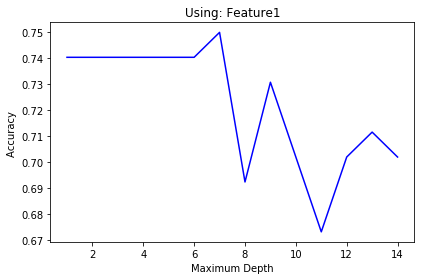

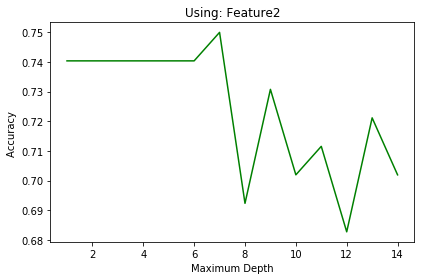

From the graphs above, we see that the best test results are: 
 using Feature1, MaximumDepth = 7  with a value of: 0.75 
 using Feature2, MaximumDepth = 7  with a value of: 0.75 



In [29]:
MaxDepth = 15
met_acc1 = np.zeros((MaxDepth-1))
met_acc2 = np.zeros((MaxDepth-1))
std_acc = np.zeros((MaxDepth-1))
for n in range(1,MaxDepth): 
    DTRClass1 = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X1_train,y1_train)
    yhat = DTRClass1.predict(X1_test)
    met_acc1[n-1] = metrics.accuracy_score(y1_test, yhat)

plt.plot(range(1,MaxDepth),met_acc1,'b')
plt.title('Using: Feature1')
plt.ylabel('Accuracy ')
plt.xlabel('Maximum Depth')
plt.tight_layout()
plt.show() 

########## DecisionTree with Feature2 (X2) ##########

for n in range(1,MaxDepth): 
    DTRClass2 = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X2_train,y2_train)
    yhat = DTRClass2.predict(X2_test)
    met_acc2[n-1] = metrics.accuracy_score(y2_test, yhat)

plt.plot(range(1,MaxDepth),met_acc2,'g')
plt.title('Using: Feature2')
plt.ylabel('Accuracy ')
plt.xlabel('Maximum Depth')
plt.tight_layout()
plt.show() 

print( "From the graphs above, we see that the best test results are:", "\n", 
      "using Feature1, MaximumDepth =", (met_acc1.argmax() +1), " with a value of:",  met_acc1.max() , "\n",
      "using Feature2, MaximumDepth =", (met_acc2.argmax() +1), " with a value of:",  met_acc2.max() , "\n"
     ) 

In [30]:
# SO WE RE-INTRODUCE DTRClass1 to be used on our "Loan_Test.csv" Data set
DTRClass1 = DecisionTreeClassifier(criterion="entropy", max_depth = 7).fit(X1_train,y1_train)

# Support Vector Machine

In [31]:
from sklearn.svm import SVC  

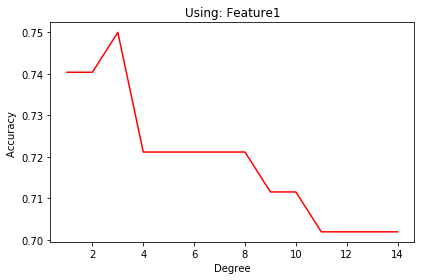

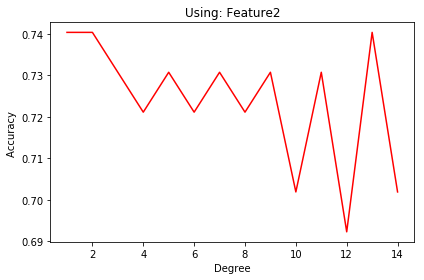

From the graphs above, we see that the best test results are: 
 using Feature1, OptimalDegree = 3  with a value of: 0.75 
 using Feature2, OptimalDegree = 1  with a value of: 0.740384615385 



In [32]:
# I want to use all the available kernels to predict.
# since the Polynomial kernal requires another attribute: degree,...
# I will first test to get the optimal degree of polynomial for my two Feature sets
# The gotten optimal degree is what I will use as a constant while evaluating with other kernels
# This is because the "degree" attribute has no effect while using other kernels

p_range=15
met_acc1_deg = np.zeros((p_range - 1))
met_acc2_deg = np.zeros((p_range - 1))
for n in range(1,p_range): 
    SVMClass1 = SVC(kernel = 'poly', degree=n).fit(X1_train,y1_train)
    yhat = SVMClass1.predict(X1_test)
    met_acc1_deg[n-1] = metrics.accuracy_score(y1_test, yhat) 
    
plt.plot(range(1,p_range),met_acc1_deg,'r')
plt.title('Using: Feature1')
plt.ylabel('Accuracy ')
plt.xlabel('Degree')
plt.tight_layout()
plt.show() 

for n in range(1,p_range): 
    SVMClass2 = SVC(kernel = 'poly', degree=n).fit(X2_train,y2_train)
    yhat = SVMClass2.predict(X2_test)
    met_acc2_deg[n-1] = metrics.accuracy_score(y2_test, yhat) 
    
#plt.plot(range(1,MaxDepth),met_acc2,'g')
plt.plot(range(1,p_range),met_acc2_deg,'r')
plt.title('Using: Feature2')
plt.ylabel('Accuracy ')
plt.xlabel('Degree')
plt.tight_layout()
plt.show() 

print( "From the graphs above, we see that the best test results are:", "\n", 
      "using Feature1, OptimalDegree =", (met_acc1_deg.argmax() +1), " with a value of:",  met_acc1_deg.max() , "\n",
      "using Feature2, OptimalDegree =", (met_acc2_deg.argmax() +1), " with a value of:",  met_acc2_deg.max() , "\n"
     ) 

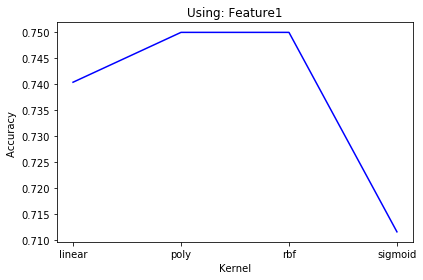

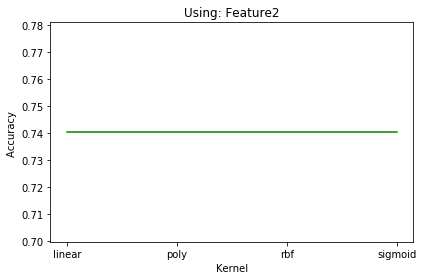

From the graphs above, we see that the best test results are: 
 using Feature1, OptimalKernel = poly  with a value of: 0.75 and degree of  3 
 using Feature2, OptimalKernel = linear  with a value of: 0.740384615385 
    ...Actually, using Feature2, all kernels produced same ACCURACY SCORE.


In [33]:
knel = ['linear','poly','rbf','sigmoid']
met_acc1 = np.zeros(len(knel))
met_acc2 = np.zeros(len(knel))


### Remember the best degree for our Feature1 is "3"
##################################################
for n in range(0,len(knel)): 
    SVMClass1 = SVC(kernel = knel[n], degree=3).fit(X1_train,y1_train)
    yhat = SVMClass1.predict(X1_test)
    met_acc1[n] = metrics.accuracy_score(y1_test, yhat) 
    
plt.plot(knel,met_acc1,'b')
plt.title('Using: Feature1')
plt.ylabel('Accuracy ')
plt.xlabel('Kernel')
plt.tight_layout()
plt.show() 


### Remember the best degree for our Feature2 is "1"
##################################################
knel = ['linear','poly','rbf','sigmoid']
for n in range(0,len(knel)): 
    SVMClass2 = SVC(kernel = knel[n], degree=1).fit(X2_train,y2_train)
    yhat = SVMClass2.predict(X2_test)
    met_acc2[n] = metrics.accuracy_score(y2_test, yhat) 
    
#plt.plot(range(1,MaxDepth),met_acc2,'g')
plt.plot(knel,met_acc2,'g')
plt.title('Using: Feature2')
plt.ylabel('Accuracy ')
plt.xlabel('Kernel')
plt.tight_layout()
plt.show() 


print( "From the graphs above, we see that the best test results are:", "\n", 
      "using Feature1, OptimalKernel =", knel[(met_acc1.argmax())], " with a value of:",  met_acc1.max() ,"and degree of ",(met_acc1_deg.argmax() +1),  "\n",
      "using Feature2, OptimalKernel =", knel[(met_acc2.argmax())], " with a value of:",  met_acc2.max() , "\n"
      "    ...Actually, using Feature2, all kernels produced same ACCURACY SCORE."
     ) 

In [34]:
# SO WE RE-INTRODUCE SVMClass1 to be used on our "Loan_Test.csv" Data set
SVMClass1 = SVC(kernel = 'poly', degree=3).fit(X1_train,y1_train)

# Logistic Regression

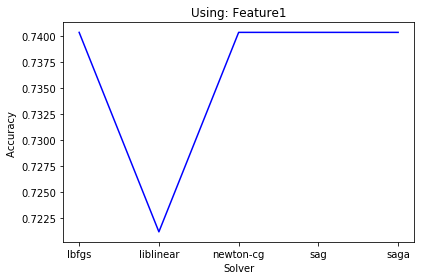

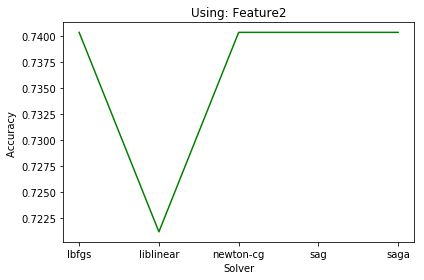

From the graphs above, we see that the best test results are: 
 using Feature1, OptimalSolver = lbfgs  with a value of: 0.740384615385 
 using Feature2, OptimalSolver = lbfgs  with a value of: 0.740384615385 
    ...Actually, Feature1 & Feature2, produced same ACCURACY SCORE.


In [35]:
from sklearn.linear_model import LogisticRegression

#LGRClass1 = LogisticRegression(C=0.01, solver='lbfgs').fit(X1_train,y1_train)
#LGRClass2 = LogisticRegression(C=0.01, solver='sag').fit(X2_train,y2_train) 
#LGRClass1 = LogisticRegression(C=0.01, solver='newton-cg').fit(X1_train,y1_train)
#LGRClass2 = LogisticRegression(C=0.01, solver='saga').fit(X2_train,y2_train)
LGRClass1 = LogisticRegression(C=0.01, solver='liblinear').fit(X1_train,y1_train)
LGRClass2 = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train,y2_train) 


solva = ['lbfgs','liblinear','newton-cg','sag','saga']
met_acc1 = np.zeros(len(solva))
met_acc2 = np.zeros(len(solva))


### using 0.1 as a constant for the C-Parameter 
##################################################
for n in range(0,len(solva)): 
    LGRClass1 = LogisticRegression(C=0.01, solver= solva[n]).fit(X1_train,y1_train)
    yhat = LGRClass1.predict(X1_test)
    met_acc1[n] = metrics.accuracy_score(y1_test, yhat) 
    
plt.plot(solva,met_acc1,'b')
plt.title('Using: Feature1')
plt.ylabel('Accuracy ')
plt.xlabel('Solver')
plt.tight_layout()
plt.show() 


### using 0.1 as a constant for the C-Parameter 
##################################################
solva = ['lbfgs','liblinear','newton-cg','sag','saga']
for n in range(0,len(solva)): 
    LGRClass2 = LogisticRegression(C=0.01, solver= solva[n]).fit(X2_train,y2_train)
    yhat = LGRClass2.predict(X2_test)
    met_acc2[n] = metrics.accuracy_score(y2_test, yhat) 
    
plt.plot(solva,met_acc1,'g')
plt.title('Using: Feature2')
plt.ylabel('Accuracy ')
plt.xlabel('Solver')
plt.tight_layout()
plt.show()


print( "From the graphs above, we see that the best test results are:", "\n", 
      "using Feature1, OptimalSolver =", solva[(met_acc1.argmax())], " with a value of:",  met_acc1.max() , "\n",
      "using Feature2, OptimalSolver =", solva[(met_acc2.argmax())], " with a value of:",  met_acc2.max() , "\n"
      "    ...Actually, Feature1 & Feature2, produced same ACCURACY SCORE."
     ) 


In [36]:
# SO WE RE-INTRODUCE LGRClass1 to be used on our "Loan_Test.csv" Data set
LGRClass1 = LogisticRegression(C=0.01, solver= 'lbfgs').fit(X1_train,y1_train)

# Model Evaluation using Test set

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [38]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-08 19:06:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-08 19:06:04 (551 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [39]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [40]:
#Apply the steps (one hot encoding and others) as in the train data set, so that the ML Agorithms can make use use of the data properly  

#Derive Weekends
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0) 

#Gender
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#loanStatus
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1], inplace=True) 

# We use the columns of "Feature1" in our ML training in cells above.
# Remember Feature2 was just out of curiosity, and we have seen the effects

test_Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature1  = pd.concat([test_Feature1,pd.get_dummies(test_df['education'])], axis=1)
test_Feature1.drop(['Master or Above'], axis = 1,inplace=True) 

# Check the Feature set are of all numeric data type
test_Feature1.dtypes


Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [41]:
# Get the dependent(y) and independent(X) variables
test_X1 = test_Feature1
test_X1 = preprocessing.StandardScaler().fit(test_X1).transform(test_X1)
test_X1[0:4]


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912]])

In [42]:
test_y1 = test_df['loan_status'].values
test_y1[0:4]

array([0, 0, 0, 0])

In [48]:
# Get the predictions
KNNyhat = KNNClass1.predict(test_X1)
DTRyhat = DTRClass1.predict(test_X1)
SVMyhat = SVMClass1.predict(test_X1)
LGRyhat = LGRClass1.predict(test_X1) 

LGRyhat_prob = LGRClass1.predict_proba(test_X1)


In [49]:
# Get results into Lists or any other suitable datatype
KNNResult = ["KNN", jaccard_similarity_score(test_y1, KNNyhat) , f1_score(test_y1, KNNyhat, average='weighted') , "NA"]
DTRResult = ["Decision Tree", jaccard_similarity_score(test_y1, DTRyhat) , f1_score(test_y1, DTRyhat, average='weighted') , "NA"] 
SVMResult = ["SVM", jaccard_similarity_score(test_y1, SVMyhat) , f1_score(test_y1, SVMyhat, average='weighted') , "NA"] 
LGRResult = ["Logistic Regression", jaccard_similarity_score(test_y1, LGRyhat) , f1_score(test_y1, LGRyhat, average='weighted') , log_loss(test_y1, LGRyhat_prob)] 


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
Lst = [KNNResult, DTRResult, SVMResult, LGRResult]
Lst = pd.DataFrame(Lst)
Lst.head()

,0,1,2,3
0,KNN,0.740741,0.683128,NA
1,Decision Tree,0.722222,0.670478,NA
2,SVM,0.759259,0.695923,NA
3,Logistic Regression,0.740741,0.630418,0.525124


In [59]:
Lst.rename(columns={0:'Algorithm', 1:'Jaccard', 2:'F1-score', 3:'LogLoss',}, inplace=True)

In [61]:
Lst

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.740741,0.683128,NA
1,Decision Tree,0.722222,0.670478,NA
2,SVM,0.759259,0.695923,NA
3,Logistic Regression,0.740741,0.630418,0.525124


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>